# Schrödinger Equation - Quantum Harmonic Oscillator

The Schrödinger equation of a harmonic oscillator is:
$$
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi = E\psi,
$$
We take $\hbar = m = 1$ and write this equation as
$$
-\frac{1}{2}\frac{d^2\psi_n}{dx^2} + (V - E_n) \psi_n = 0,
$$
where $V = \omega^2 x^2 / 2$. The energy eigenvalues are $E_n = \omega (n + 1/2)$.

In [2]:
%%capture
!pip install elvet

## Calculation

We use `elvet.solve` to find the energy eigenstate $\psi_n$.

In [1]:
import elvet

n = 5
omega = 0.5
E = (n + 0.5) * omega

def equation(x, psi, dpsi, d2psi):
    V = 0.5 * omega**2 * x**2
    return -d2psi / 2 + (V - E)*psi

x = elvet.box((-10, 10, 101))

psi_0, dpsi_dx_0 = (1, 0) if n % 2 == 0 else (0, 1)
bcs = [
    elvet.BC(0, lambda x, psi, dpsi, d2psi: psi - psi_0),
    elvet.BC(0, lambda x, psi, dpsi, d2psi: dpsi - dpsi_dx_0),
]

result = elvet.solver(equation, bcs, x, epochs=50000)

 Elvet: epoch = 1, loss = 3.49e+01, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 2.73e-02, elapsed time = 00:00:03
 Elvet: epoch = 20000, loss = 8.64e-03, elapsed time = 00:00:06
 Elvet: epoch = 30000, loss = 1.63e-03, elapsed time = 00:00:09
 Elvet: epoch = 40000, loss = 3.24e-04, elapsed time = 00:00:12
 Elvet: epoch = 50000, loss = 8.54e-05, elapsed time = 00:00:15


## Checks

Plot and compare with the analytical solution

$$
\psi(x) = \frac{\omega^{1/4}}{\pi^{1/4} \sqrt{2^n n!}} e^{-\frac{\omega x^2}{2}} \mathcal{H}_n\left(\sqrt{\omega} x\right).
$$

The normalization of the solution we have obtained with Elvet is defined by either $\psi(0) = 1$ or $\psi'(x) = 1$. We should rescale the analytical solution in the same way before comparing.

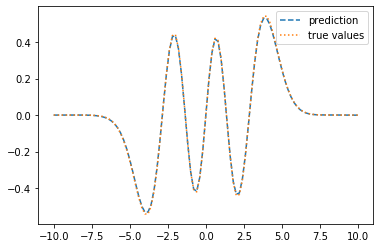

In [3]:
import numpy as np
from numpy.polynomial.hermite import hermval

import elvet.plotting

coeff = [0]*n + [1]
 
def psi(x):
    return (
        1 / (2**n * np.math.factorial(n))**0.5
        * (omega / np.pi)**(1/4)
        * np.exp(-omega * x**2 / 2)
        * hermval(omega**0.5 * x, coeff)
    )

def psi_compare(x):
    if n % 2 == 0:
        return psi(x) / psi(0)
    else:
        dpsi = elvet.math.derivative(psi, x[50], 1)
        return psi(x) / dpsi

elvet.plotting.plot_prediction(result, true_function=psi_compare)

## Comparison with Mathematica

Mathematica code:
```mathematica
sol = NDSolve[{-0.5*y''[x] + (0.5*0.5^2*x^2 - (5 + 0.5)*0.5) y[x] == 0, y[0] == 0, y'[0] == 0.864879}, y[x], {x, -10, 10}];
Plot[y[x] /. sol[[1]], {x, -10, 10}]
dataset := Table[{x, y[x] /. sol[[1]]}, {x, -10, 10, 0.06}];
Export["QHO.txt", dataset, "CSV"];
```

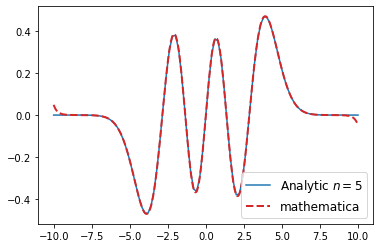

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

legend = []
plt.plot(x, psi(x))
legend.append(f'Analytic $n={int(n)}$')
try:
    mathematica = pd.read_csv('QHO.txt',header=None,names=['x','y'])
    plt.plot(
        mathematica.x, mathematica.y,
        linestyle='dashed', lw=2, color='tab:red'
    )
    legend.append('mathematica')
except:
    pass

plt.legend(legend, fontsize=12)
plt.show()